<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/REGRESION/regression_model_checking_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representación gráfica de la bonananza de un modelo de regresión: 

Residuals vs fitted values : Become suspicious when the residuals grow as a function of predicted value (Heteroscedasticity). Observing a ‘bowed’ pattern indicates that the model makes systematic errors whenever it is making unusually large or small predictions therefore indicating presence of nonlinear patterns in the data (nonlinearity). 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


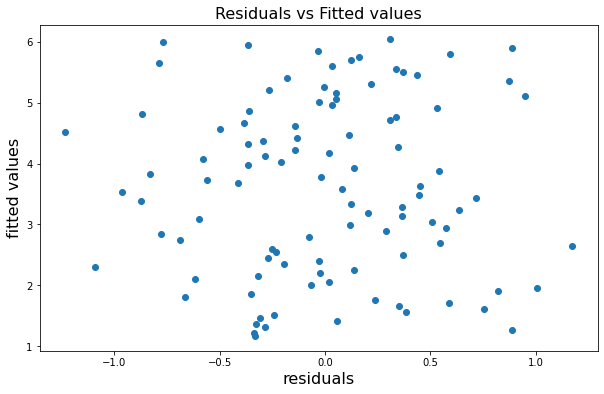

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
e = np.random.normal(size=nsample)

X = sm.add_constant(x) # adds a first column with ones
sig = 0.5
y_true = np.dot(X, beta)
y = y_true + sig*e

model = sm.OLS(y, X)
results = model.fit()

fig = plt.figure(figsize=(10,6))
plt.scatter(results.resid,results.fittedvalues)
plt.title('Residuals vs Fitted values',fontsize=16)
plt.ylabel('fitted values',fontsize=16)
plt.xlabel('residuals',fontsize=16)
plt.show()


Residuals vs explanatory variables

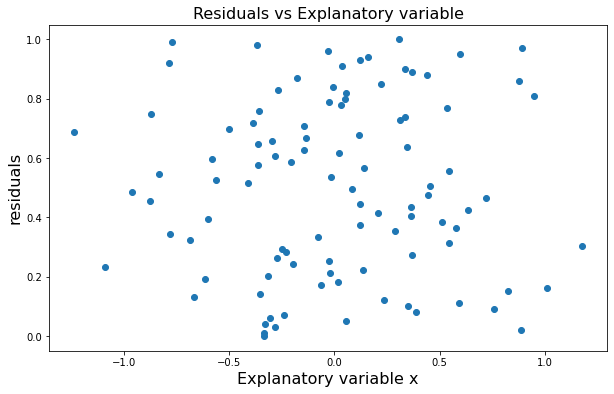

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.scatter(results.resid,model.exog[:,1])
plt.title('Residuals vs Explanatory variable',fontsize=16)
plt.xlabel('Explanatory variable x',fontsize=16)
plt.ylabel('residuals',fontsize=16)
plt.show()

**Testing heteroscedasticity**: The Breusch-Pagan Lagrange Multiplier test for heteroscedasticity.

Tests the hypothesis that the residual variance does not depend on the variables in x.

https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_breuschpagan.html

https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test
        

In [ ]:
lm,lmp,f,fp = sm.stats.diagnostic.het_breuschpagan(results.resid,model.exog)
print('Lagrange multiplier p-value = {}'.format(lmp))
print('F-score p-value = {}'.format(fp))

Lagrange multiplier p-value = 0.686050061790996
F-score p-value = 0.6896703913615765


Residuals vs normal deviates (q-q plot): Residuals shoud be normally distributed

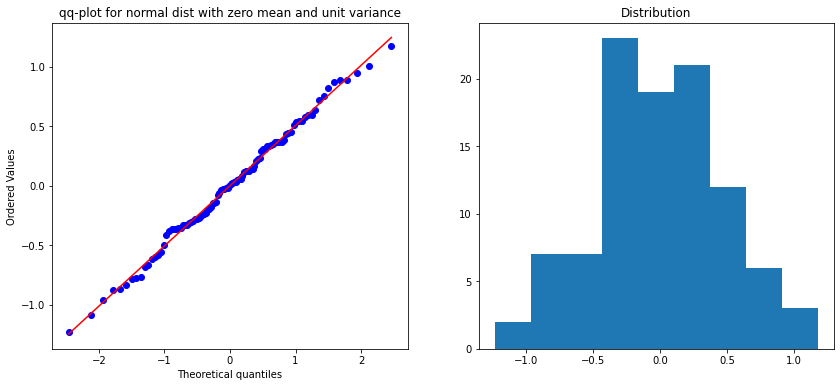

In [ ]:
import scipy.stats as stats
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
res = stats.probplot(results.resid, dist=stats.norm, sparams=(0,1), plot=ax)
ax.set_title("qq-plot for normal dist with zero mean and unit variance")
ax1 = fig.add_subplot(122)
plt.hist(results.resid, bins='auto')
ax1.set_title("Distribution")
plt.show()

Model inspection plots included in the statsmodels library:

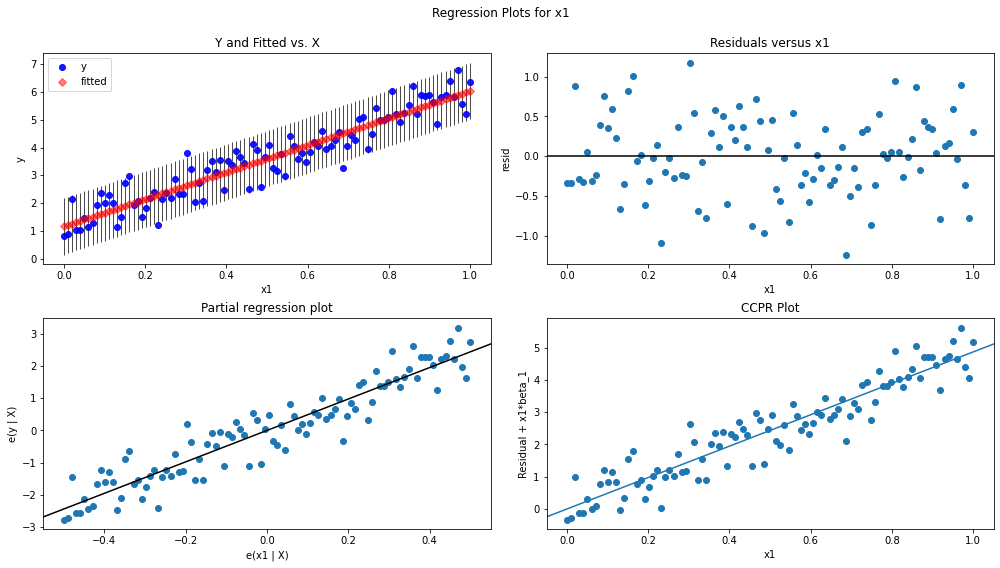

In [ ]:
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(results, "x1", fig=fig)

Let's see what happens when data is nonlinear and we fit a linear model:

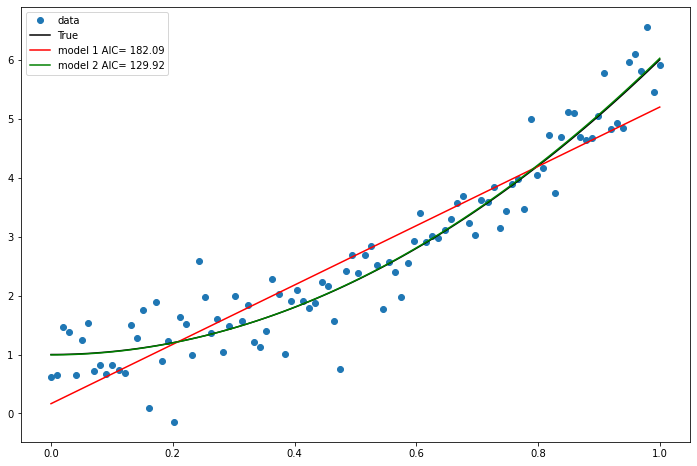

In [ ]:
nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
sig = 0.5
e = np.random.normal(size=nsample)


X = sm.add_constant(x) # adds a first column with ones
y_true = np.dot(X**2, beta)
y = y_true + sig*e

model1 = sm.OLS(y, X)
results1 = model1.fit()

X2 = np.column_stack((x, x**2))
X2 = sm.add_constant(X2) # adds a first column with ones
model2 = sm.OLS(y, X2)
results2 = model2.fit()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'k-', label="True")
ax.plot(x, results1.fittedvalues, 'r-', label="model 1 AIC= {:.5}".format(results1.aic))
ax.plot(x, results2.fittedvalues, 'g-', label="model 2 AIC= {:.5}".format(results2.aic))
ax.legend()
plt.show()

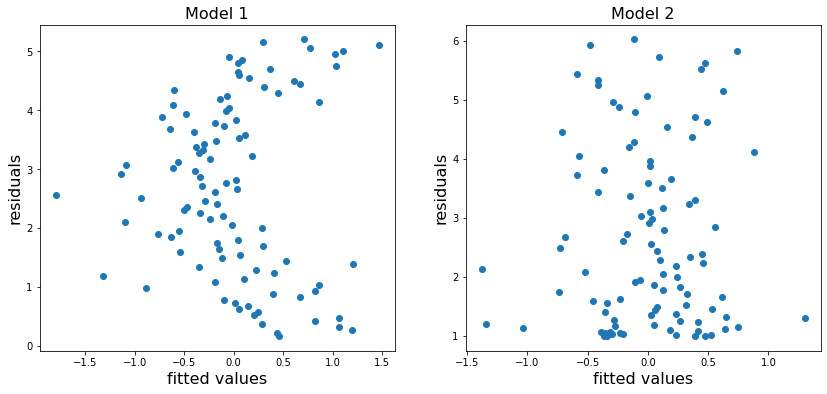

In [ ]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
plt.scatter(results1.resid,results1.fittedvalues)
plt.title('Model 1',fontsize=16)
plt.xlabel('fitted values',fontsize=16)
plt.ylabel('residuals',fontsize=16)

ax1 = fig.add_subplot(122)
plt.scatter(results2.resid,results2.fittedvalues)
plt.title('Model 2',fontsize=16)
plt.xlabel('fitted values',fontsize=16)
plt.ylabel('residuals',fontsize=16)
plt.show()

Let's see what happens when errors are not normally distributed:

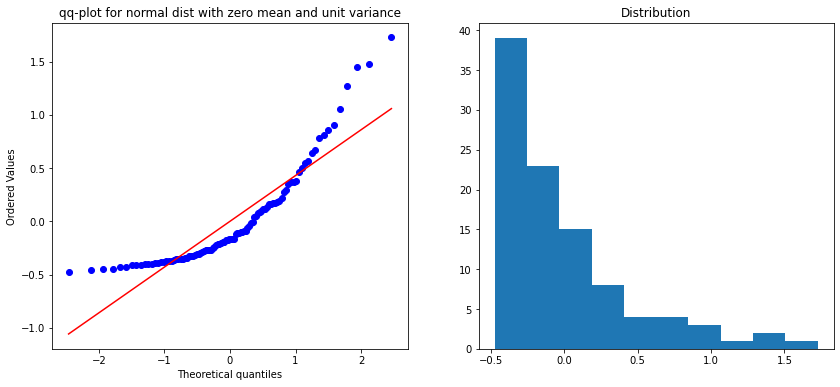

In [ ]:
nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
sig = 0.5
e = np.random.exponential(size=nsample)


X = sm.add_constant(x) # adds a first column with ones
y_true = np.dot(X, beta)
y = y_true + sig*e

model = sm.OLS(y, X)
results = model.fit()
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
res = stats.probplot(results.resid, dist=stats.norm, sparams=(0,1), plot=ax)
ax.set_title("qq-plot for normal dist with zero mean and unit variance")
ax1 = fig.add_subplot(122)
plt.hist(results.resid, bins='auto')
ax1.set_title("Distribution")
plt.show()

Let's see what happens when variance depends on explanatory variable:

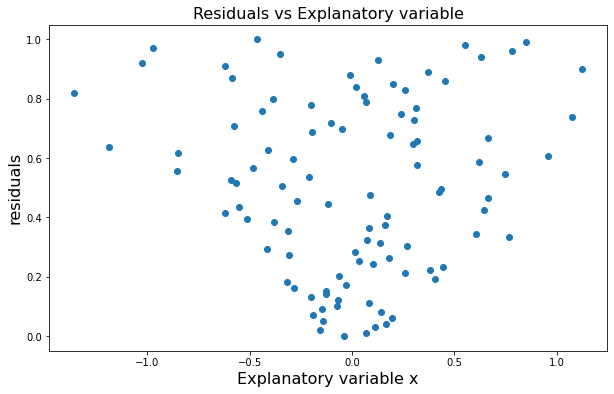

In [ ]:
nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
sig = np.linspace(0.1, 0.8, nsample)
e = np.random.normal(size=nsample)

X = sm.add_constant(x) # adds a first column with ones
y_true = np.dot(X, beta)
y = y_true + sig*e

model = sm.OLS(y, X)
results = model.fit()
fig = plt.figure(figsize=(10,6))

plt.scatter(results.resid,model.exog[:,1])
plt.title('Residuals vs Explanatory variable',fontsize=16)
plt.xlabel('Explanatory variable x',fontsize=16)
plt.ylabel('residuals',fontsize=16)
plt.show()

Working with dataframes and using 'R-like' formulas for the model specification:

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

#x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
#y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

nsample = 100
x = np.linspace(0, 1, nsample)
beta = np.array([1, 5])
e = np.random.normal(size=nsample)

X = sm.add_constant(x) # adds a first column with ones
sig = 0.5
y_true = np.dot(X, beta)
y = y_true + sig*e

df = pd.DataFrame(columns=['y', 'x'])
df['x'] = x
df['y'] = y

degree = 3
weights = np.polyfit(x, y, degree)
model = np.poly1d(weights)
results = smf.ols(formula='y ~ model(x)', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     851.9
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           3.90e-50
Time:                        17:20:34   Log-Likelihood:                -76.360
No. Observations:                 100   AIC:                             156.7
Df Residuals:                      98   BIC:                             161.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.216e-16      0.131    5.5e-15      1.000      -0.260       0.260
model(x)       1.0000      0.034     29.188      0.000       0.932       1.068
==============================================================================
Omnibus:                        2.387   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                2.390
Skew:                          -0.333   Prob(JB):                        0.303
Kurtosis:                       2.641   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

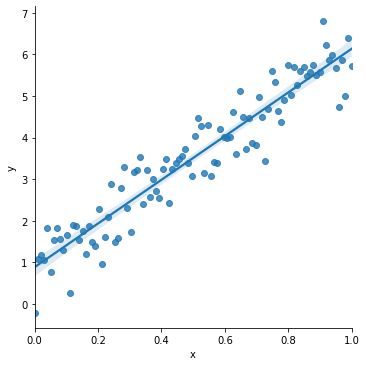

In [ ]:
import seaborn as sns
sns.lmplot(x="x", y="y", data=df);
plt.show()


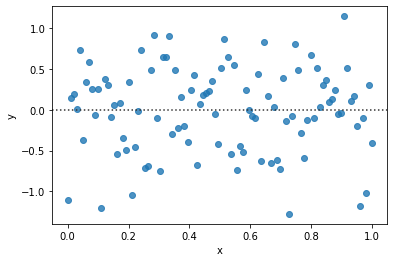

In [ ]:
sns.residplot(x="x", y="y", data=df);

# Multivariate linear regression using statsmodels and pandas:

We will use the well-known boston dataset included in the sklearn built-in datasets: Detailed information can be found https://scikit-learn.org/stable/datasets/index.html#boston-dataset
	
The dataset includes 13 numeric/categorical predictive variables:

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT $\%$ lower status of the population


and one response variable: 

MEDV Median value of owner-occupied homes in $1000’s

In [ ]:
from pandas import DataFrame

from sklearn.datasets import load_boston
boston = load_boston()

# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(boston.data, columns=boston.feature_names)
list(df)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

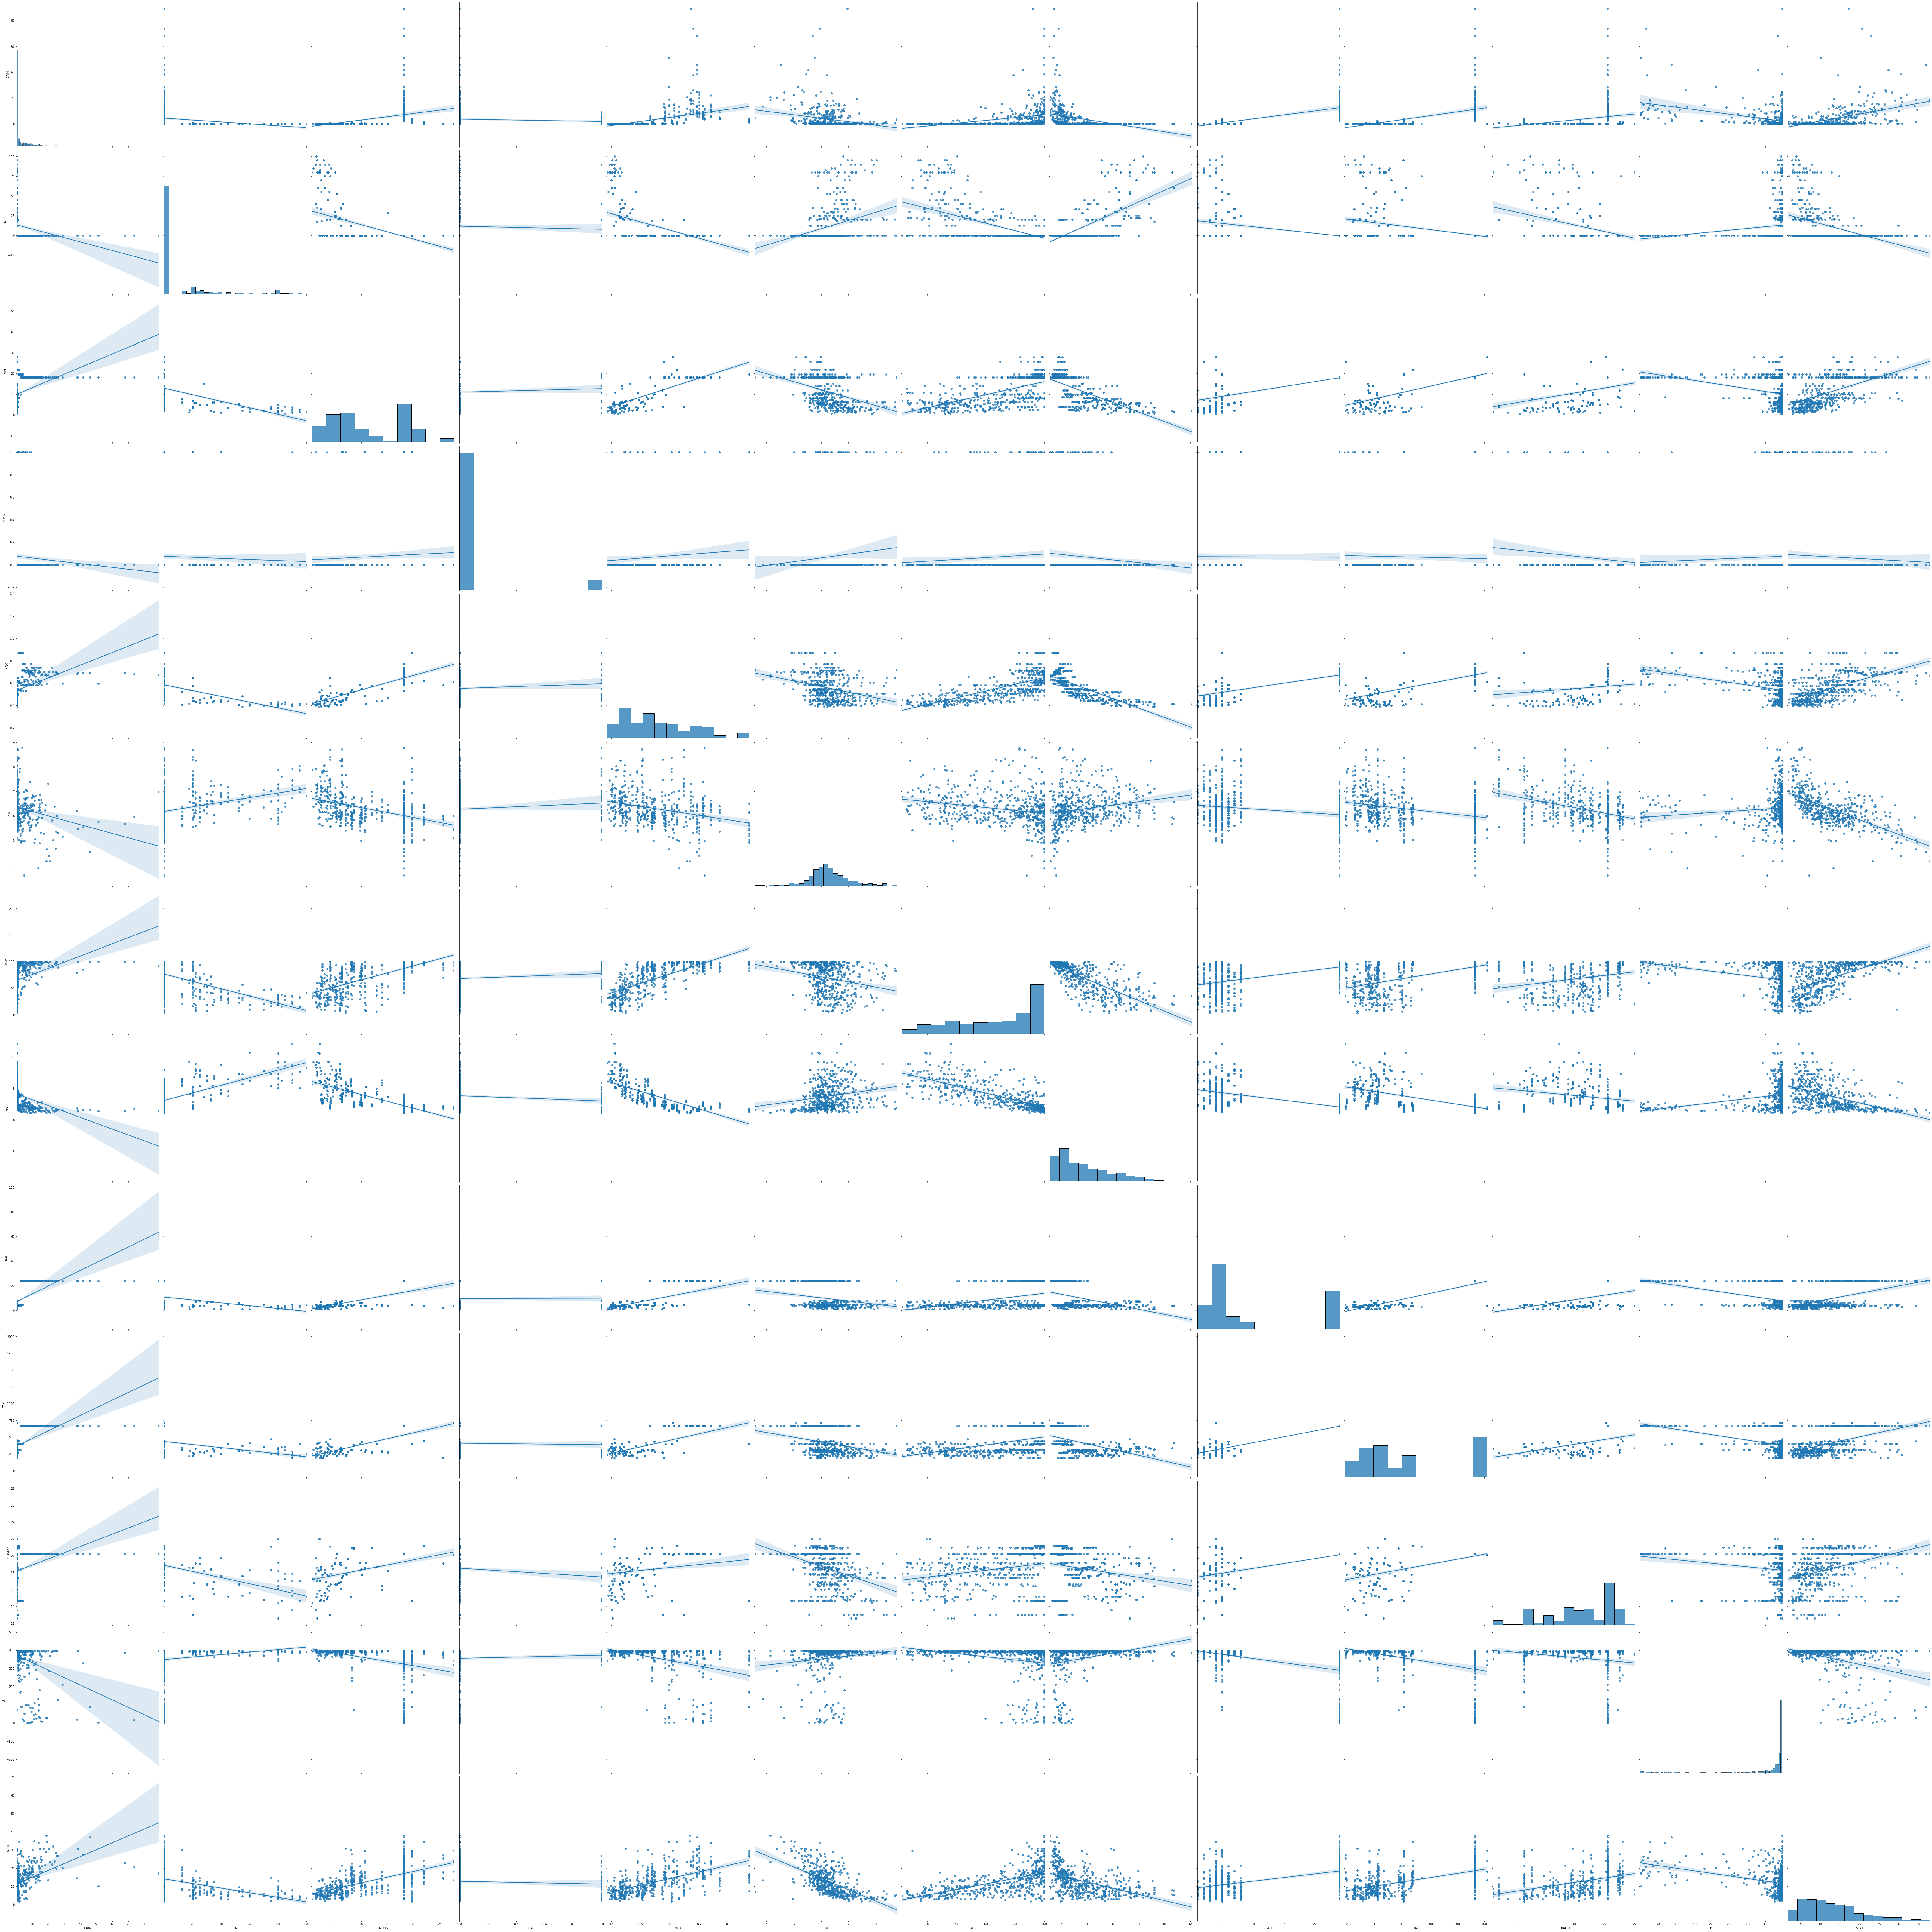

In [ ]:
sns.pairplot(df, kind="reg",height=7)
plt.show()

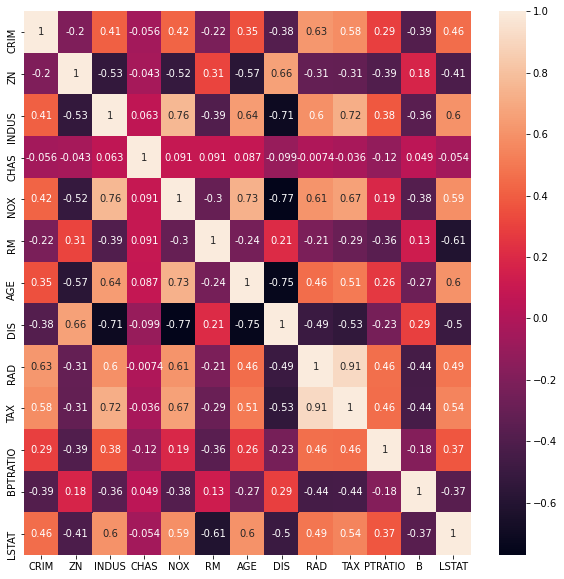

In [ ]:
plt.figure(figsize= (10, 10))
sns.heatmap(df.corr(),annot= True)
plt.show()

In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [ ]:
import statsmodels.api as sm

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(boston.target, columns=["MEDV"])

import statsmodels.api as sm # import statsmodels 

X = df[["CRIM","INDUS"]] ## X uis the input variables (or independent variables)
y = target["MEDV"] ## Y is the output/dependent variable
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     96.83
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           2.66e-36
Time:                        17:22:38   Log-Likelihood:                -1757.8
No. Observations:                 506   AIC:                             3522.
Df Residuals:                     503   BIC:                             3534.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.2483      0.670     43.624      0.000      27.931      30.566
CRIM          -0.2455      0.044     -5.536      0.000      -0.333      -0.158
INDUS         -0.5234      0.056     -9.414      0.000      -0.633      -0.414
==============================================================================
Omnibus:                      193.751   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.883
Skew:                           1.800   Prob(JB):                    1.03e-142
Kurtosis:                       7.248   Cond. No.                         27.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Multivariate linear regression using sklearn libraries: 

In [ ]:
from sklearn import linear_model
X = df[["CRIM","INDUS"]]
y = target["MEDV"]
lm = linear_model.LinearRegression()
modelsk = lm.fit(X,y)
predictions = lm.predict(X)
lm.coef_

array([-0.24547819, -0.52335108])

Compare with the parameters found by using the statsmodels libraries:

In [ ]:
print('Intercetp = {}'.format(lm.intercept_))
print('PArameters = {}  {}'.format(*modelsk.coef_))

Intercetp = 29.24829270645782
PArameters = -0.2454781928314824  -0.5233510811079853


In [ ]:
model.params

const    29.248293
CRIM     -0.245478
INDUS    -0.523351
dtype: float64

Represent the multivariate regression as 3d scatter plot:

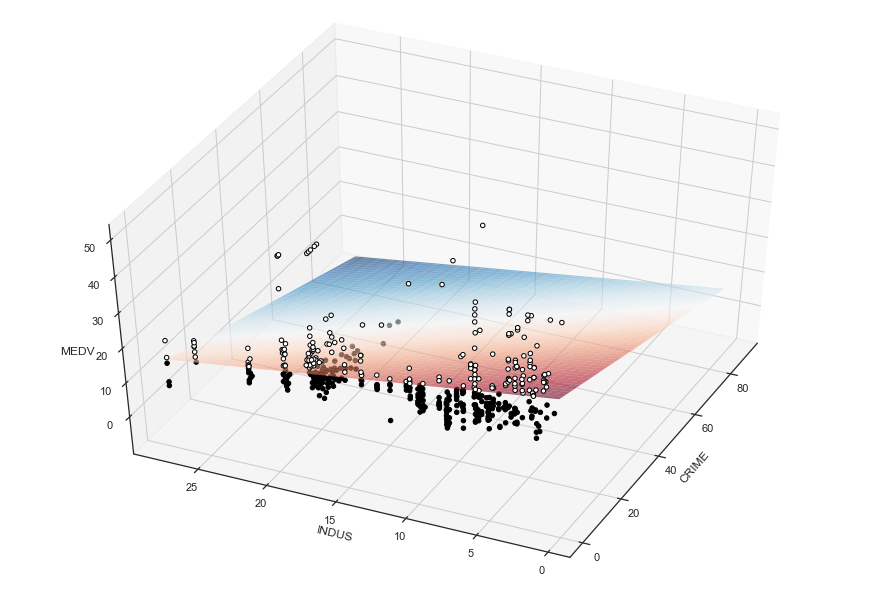

In [ ]:
## Create the 3d plot 
from mpl_toolkits.mplot3d import Axes3D

xx1, xx2 = np.meshgrid(np.linspace(X["CRIM"].min(), X["CRIM"].max(), 100), 
                       np.linspace(X["INDUS"].min(), X["INDUS"].max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = model.params[0] + model.params[1] * xx1 + model.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-155, elev=45)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
ax.scatter(X["CRIM"][model.resid >=0], X["INDUS"][model.resid >=0], y[model.resid >=0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X["CRIM"][model.resid <0], X["INDUS"][model.resid <0], y[model.resid <0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('CRIME')
ax.set_ylabel('INDUS')
ax.set_zlabel('MEDV')
plt.show()